In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Scenario 2: TITANIC SURVIVAL PREDICTION USING
    LOGISTIC REGRESSION
    Industry: Insurance
    
    The sinking of the Titanic is one of the most infamous shipwrecks in history.
    On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after
    colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the
    death of 1502 out of 2224 passengers and crew.
    While there was some element of luck involved in surviving, it seems some groups of people were more likely
    to survive than others.
    In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people
    were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
    
    Tasks to be Performed:
    Import the required libraries
    Prepare the data (Data Proprocessing)
    Check for missing value
    Explore the data using EDA
    Training a logistic regression model
    Evaluating the model
    
    Variable Attributes
    pclass: Ticket class [1 = 1st, 2 = 2nd, 3 = 3rd]
    sex: Sex
    Age: Age in years(Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
    sibsp: # of siblings / spouses aboard the Titanic (Sibling = brother, sister, stepbrother, stepsister;
    Spouse = husband, wife (mistresses and fiancés were ignored)
    parch: # of parents / children aboard the Titanic (Parent = mother, father; Child = daughter, son,
    stepdaughter, stepson; Some children travelled only with a nanny, therefore parch=0 for them.
    ticket: Ticket number
    fare: Passenger fare
    cabin: Cabin number
    embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
    Target Variable:
    survival: Survival [0 = No, 1 = Yes]


In [57]:
df = pd.read_csv('titainic_train.csv', index_col=['PassengerId'])
survived = df['Survived']
df.drop('Survived',axis=1, inplace=True)
df['Survived'] = survived
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [58]:
#Prepare the data (Data Proprocessing)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [59]:
from sklearn.impute import SimpleImputer

In [60]:
si = SimpleImputer()
result = si.fit_transform(df[['Age']])
df['Age'] = result.reshape(-1)

In [61]:
si = SimpleImputer(strategy='most_frequent')
result = si.fit_transform(df[['Cabin']])
df['Cabin'] = result.reshape(-1)

In [62]:
si = SimpleImputer(strategy='most_frequent')
result = si.fit_transform(df[['Embarked']])
df['Embarked'] = result.reshape(-1)

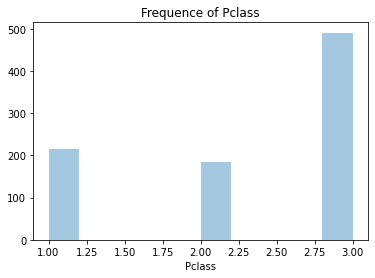

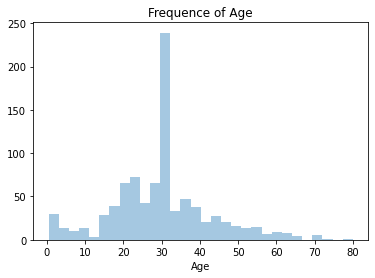

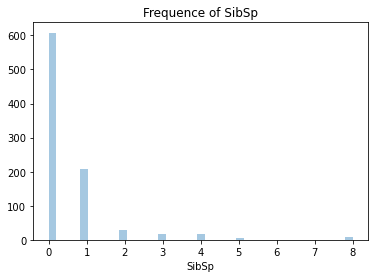

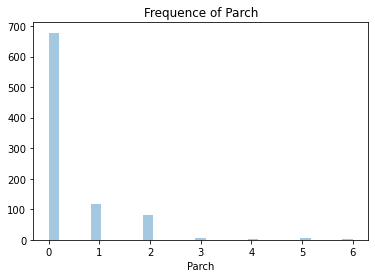

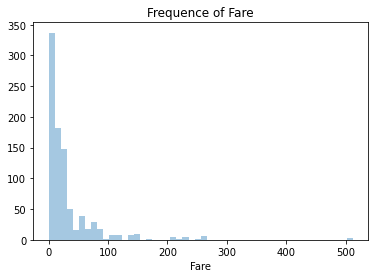

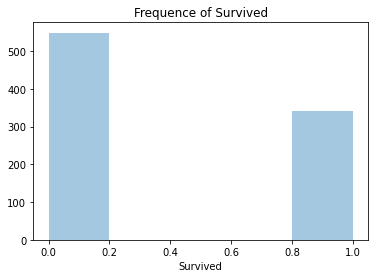

In [63]:
for column in df.select_dtypes(exclude=['object']):
    sns.distplot(df[column], kde=False)
    plt.title(f'Frequence of {column}')
    plt.show()

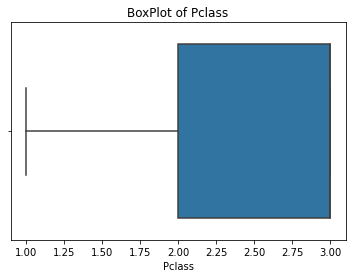

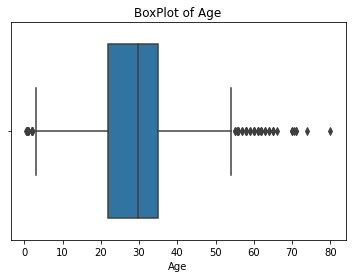

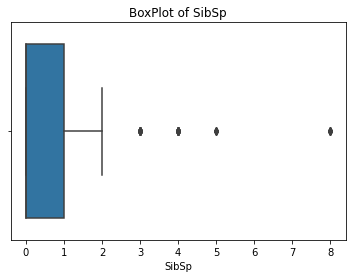

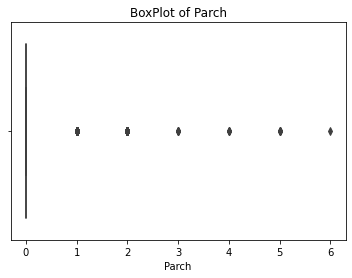

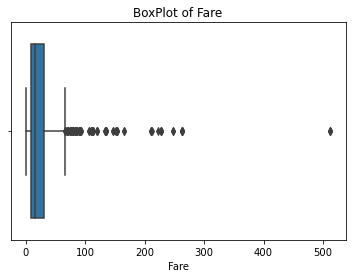

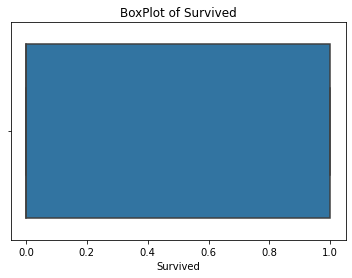

In [64]:
for column in df.select_dtypes(exclude=['object']):
    sns.boxplot(df[column])
    plt.title(f'BoxPlot of {column}')
    plt.show()

In [113]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [114]:
df_copy = df.copy()
categorical_columns = df_copy.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
for column in categorical_columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
df_copy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,
1,3,1,22.0,1,0,7.2500,47,2,0
2,1,0,38.0,1,0,71.2833,81,0,1
3,3,0,26.0,0,0,7.9250,47,2,1
4,1,0,35.0,1,0,53.1000,55,2,1
5,3,1,35.0,0,0,8.0500,47,2,0


In [115]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [116]:
#sns.pairplot(df_copy)

<AxesSubplot:>

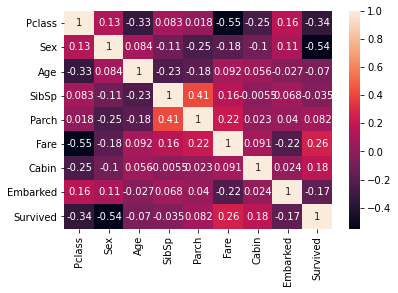

In [117]:
sns.heatmap(df_copy.corr(), annot=True)

In [118]:
X = df_copy.iloc[:, :-1] 
y = df_copy.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [119]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [19, 55]], dtype=int64)

In [120]:
precision_score(y_test, y_pred),accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7857142857142857, 0.8100558659217877, 0.7638888888888888)

In [135]:
df_test = pd.read_csv('titanic_test.csv', index_col = ['PassengerId'])
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
df_test.dropna(inplace=True)
df_test.drop(columns=['Name', 'Ticket'], inplace=True)
df_test.shape

(87, 8)

In [123]:
si = SimpleImputer()
result = si.fit_transform(df_test[['Age']])
df_test['Age'] = result.reshape(-1)

si = SimpleImputer(strategy='most_frequent')
result = si.fit_transform(df_test[['Cabin']])
df_test['Cabin'] = result.reshape(-1)

si = SimpleImputer(strategy='most_frequent')
result = si.fit_transform(df_test[['Embarked']])
df_test['Embarked'] = result.reshape(-1)

si = SimpleImputer()
result = si.fit_transform(df_test[['Fare']])
df_test['Fare'] = result.reshape(-1)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [124]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    df_test[column] = le.fit_transform(df_test[column])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,15,1
893,3,0,47.0,1,0,7.0000,15,2
894,2,1,62.0,0,0,9.6875,15,1
895,3,1,27.0,0,0,8.6625,15,2
896,3,0,22.0,1,1,12.2875,15,2


In [126]:
y_pred = lr.predict(df_test)

In [127]:
df_test['Survived_pred'] = y_pred

In [128]:
df_survived = df_test[df_test['Survived_pred'] == 1]
df_survived.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_pred
PassengerId,,,,,,,,,
898,3,0,30.0,0,0,7.6292,15,1,1
900,3,0,18.0,0,0,7.2292,15,0,1
904,1,0,23.0,1,0,82.2667,12,2,1
906,1,0,47.0,1,0,61.1750,60,2,1
907,2,0,24.0,1,0,27.7208,15,0,1


In [129]:
df_survived['Pclass'].value_counts()

1    56
3    54
2    29
Name: Pclass, dtype: int64

In [130]:
true_survived = pd.read_csv('True_Survived.csv')

In [131]:
confusion_matrix(true_survived ,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [331, 418]